In [1]:
from sequenzo import *
import pandas as pd

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_df

,ID,15,16,17,18,19,20,21,22,23,...,26,27,28,29,30,31,32,33,34,35
0,1,1,1,1,1,1,1,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,1,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,6,1,1,2,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,7,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1992,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1534,1995,2,2,2,2,2,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
1535,1996,1,2,2,2,2,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1536,1997,1,1,1,1,1,1,2,3,3,...,3,3,3,3,3,3,3,3,3,3


In [2]:
time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"])

happiness_sequence = SequenceData(data=happiness_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=[1, 2, 3, 4, 5],
                                 labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3]

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3, 4, 5]


In [3]:
distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_family

[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,20.0,34.0,28.0,8.0,6.0,8.0,10.0,8.0,16.0,...,16.0,16.0,12.0,22.0,4.0,30.0,12.0,10.0,6.0,6.0
1,20.0,0.0,20.0,20.0,22.0,26.0,14.0,16.0,12.0,16.0,...,12.0,8.0,12.0,18.0,20.0,24.0,28.0,30.0,26.0,24.0
2,34.0,20.0,0.0,36.0,42.0,34.0,34.0,34.0,30.0,32.0,...,18.0,20.0,22.0,34.0,38.0,42.0,30.0,34.0,40.0,36.0
3,28.0,20.0,36.0,0.0,24.0,32.0,22.0,18.0,24.0,16.0,...,28.0,26.0,28.0,6.0,24.0,6.0,36.0,32.0,28.0,28.0
4,8.0,22.0,42.0,24.0,0.0,12.0,10.0,12.0,12.0,16.0,...,24.0,22.0,20.0,24.0,4.0,24.0,18.0,14.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,30.0,24.0,42.0,6.0,24.0,36.0,22.0,20.0,26.0,18.0,...,32.0,28.0,32.0,8.0,26.0,0.0,42.0,38.0,30.0,30.0
1534,12.0,28.0,30.0,36.0,18.0,6.0,20.0,22.0,16.0,24.0,...,22.0,24.0,18.0,34.0,16.0,42.0,0.0,4.0,12.0,12.0
1535,10.0,30.0,34.0,32.0,14.0,4.0,18.0,20.0,18.0,24.0,...,22.0,26.0,18.0,30.0,14.0,38.0,4.0,0.0,10.0,10.0
1536,6.0,26.0,40.0,28.0,6.0,6.0,14.0,16.0,14.0,20.0,...,22.0,22.0,18.0,28.0,6.0,30.0,12.0,10.0,0.0,4.0


In [4]:
distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_happiness

[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,32.0,16.0,38.0,42.0,38.0,10.0,32.0,16.0,10.0,...,10.0,32.0,30.0,2.0,6.0,42.0,22.0,22.0,28.0,32.0
1,32.0,0.0,28.0,14.0,14.0,20.0,36.0,32.0,32.0,38.0,...,34.0,32.0,8.0,34.0,32.0,14.0,28.0,28.0,28.0,32.0
2,16.0,28.0,0.0,36.0,40.0,34.0,16.0,28.0,22.0,16.0,...,14.0,28.0,32.0,16.0,16.0,40.0,14.0,18.0,24.0,28.0
3,38.0,14.0,36.0,0.0,12.0,18.0,40.0,34.0,38.0,42.0,...,38.0,38.0,14.0,38.0,38.0,12.0,30.0,38.0,32.0,30.0
4,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
1534,22.0,28.0,14.0,30.0,38.0,26.0,20.0,32.0,26.0,22.0,...,20.0,34.0,32.0,22.0,22.0,38.0,0.0,24.0,28.0,32.0
1535,22.0,28.0,18.0,38.0,42.0,36.0,30.0,16.0,16.0,32.0,...,32.0,14.0,28.0,24.0,20.0,42.0,24.0,0.0,10.0,26.0
1536,28.0,28.0,24.0,32.0,36.0,30.0,36.0,16.0,16.0,38.0,...,34.0,14.0,32.0,30.0,22.0,36.0,28.0,10.0,0.0,22.0


## UMAP (Uniform Manifold Approximation and Projection)


In [13]:
import umap.umap_ as umap  
import hdbscan
import numpy as np

# Step 1: 运行 UMAP 降维
umap_family = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=5, metric='precomputed', random_state=42)
X_family_umap = umap_family.fit_transform(distance_matrix_family)

umap_happiness = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=5, metric='precomputed', random_state=42)
X_happiness_umap = umap_happiness.fit_transform(distance_matrix_happiness)

# Step 2: 拼接两个领域的嵌入向量
X_concat_umap = np.hstack([X_family_umap, X_happiness_umap])

# Step 3: 运行 HDBSCAN 聚类
clusterer = hdbscan.HDBSCAN(min_cluster_size=80, min_samples=10)
labels_umap = clusterer.fit_predict(X_concat_umap)

# Step 4: 看看结果如何
unique, counts = np.unique(labels_umap, return_counts=True)
print("UMAP + HDBSCAN cluster sizes:", dict(zip(unique, counts)))


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all

UMAP + HDBSCAN cluster sizes: {-1: 54, 0: 103, 1: 152, 2: 168, 3: 80, 4: 133, 5: 174, 6: 108, 7: 83, 8: 175, 9: 124, 10: 184}


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, fcluster

# Step 1: 用原始聚类中心计算 cluster 之间距离
# 方法：每个 cluster 的平均向量
import pandas as pd
import numpy as np

df = pd.DataFrame(X_concat_umap)
df["cluster"] = labels_umap

cluster_centers = df.groupby("cluster").mean()
dists = pairwise_distances(cluster_centers)

# Step 2: 层次聚类合并
Z = linkage(dists, method='ward')
cluster_labels_merged = fcluster(Z, t=4, criterion='maxclust')  # 👈 控制总类数

# Step 3: 把原 cluster 映射到 merged cluster
mapping = dict(zip(cluster_centers.index, cluster_labels_merged))
labels_final = df["cluster"].map(mapping).values

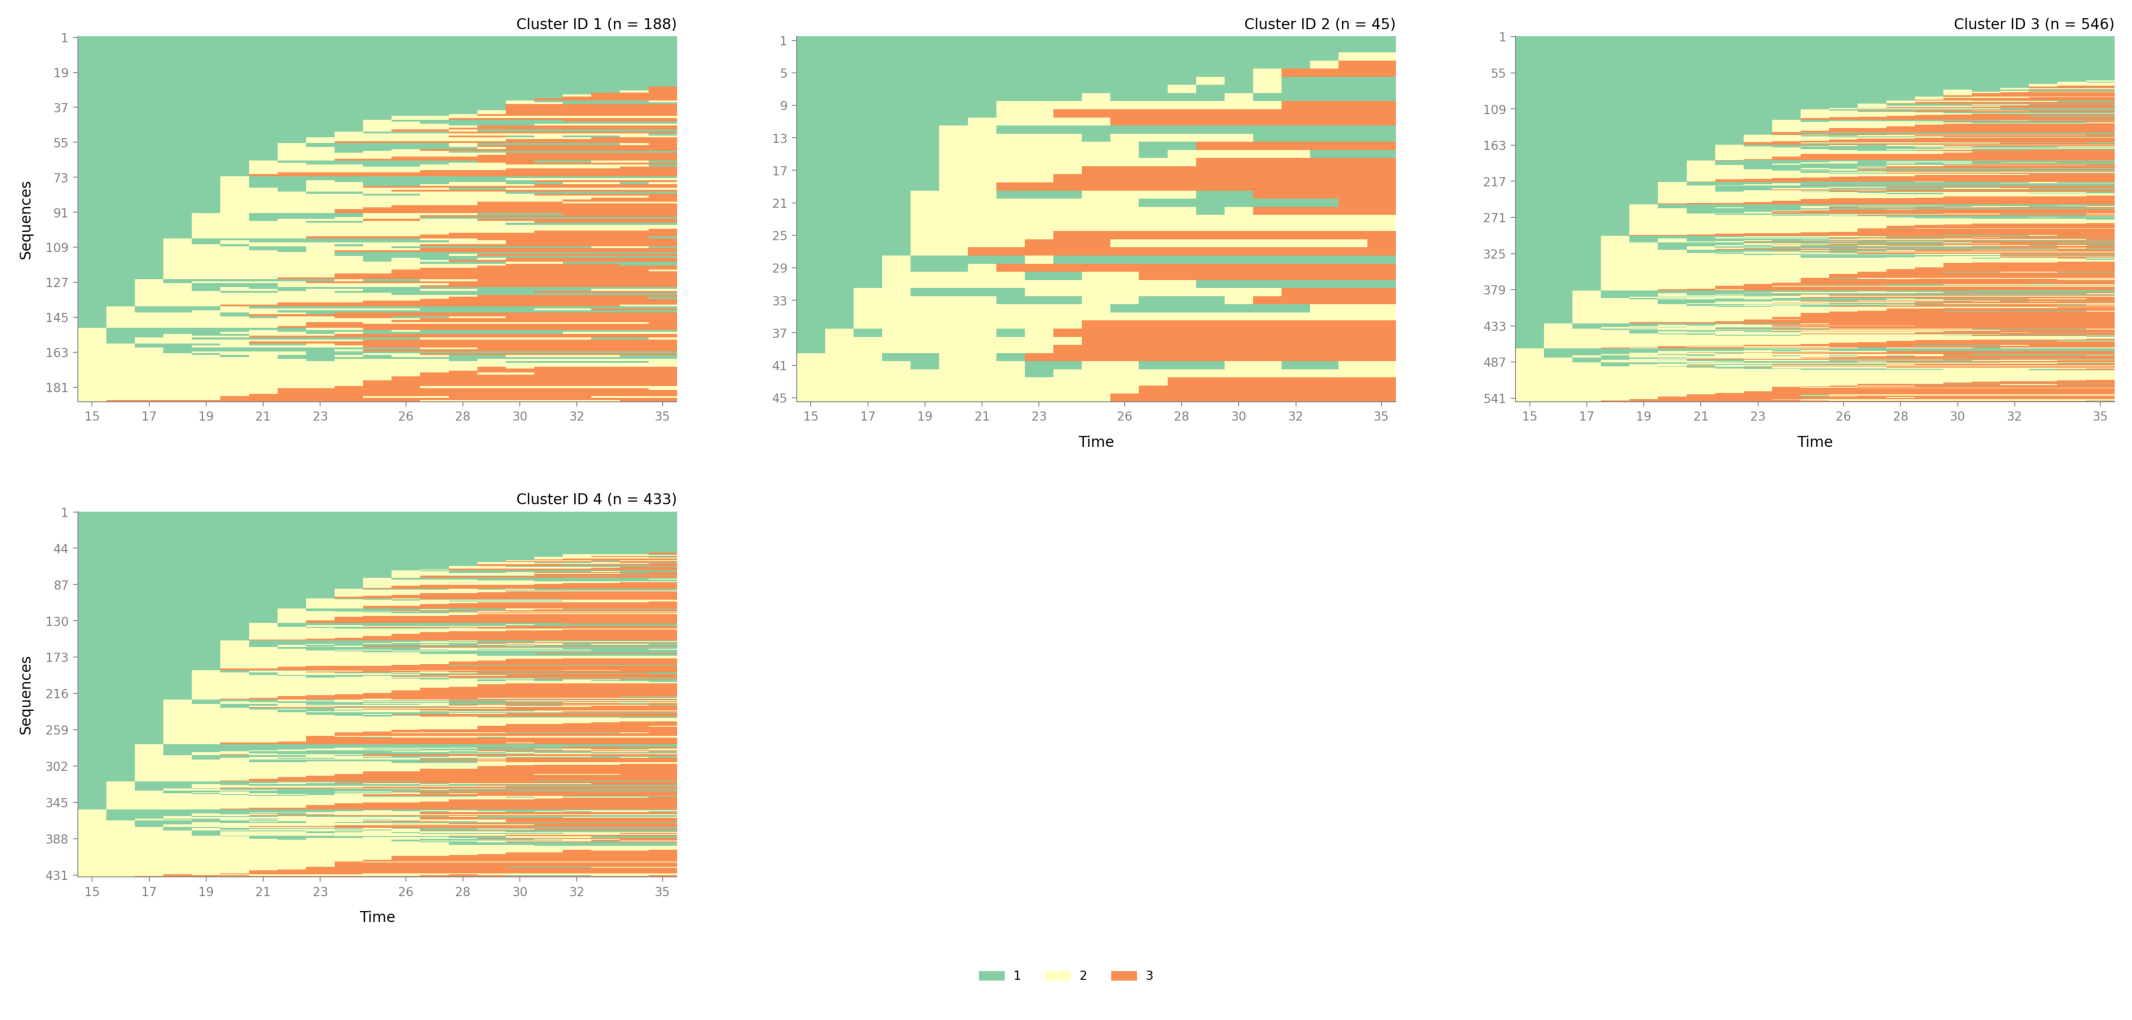

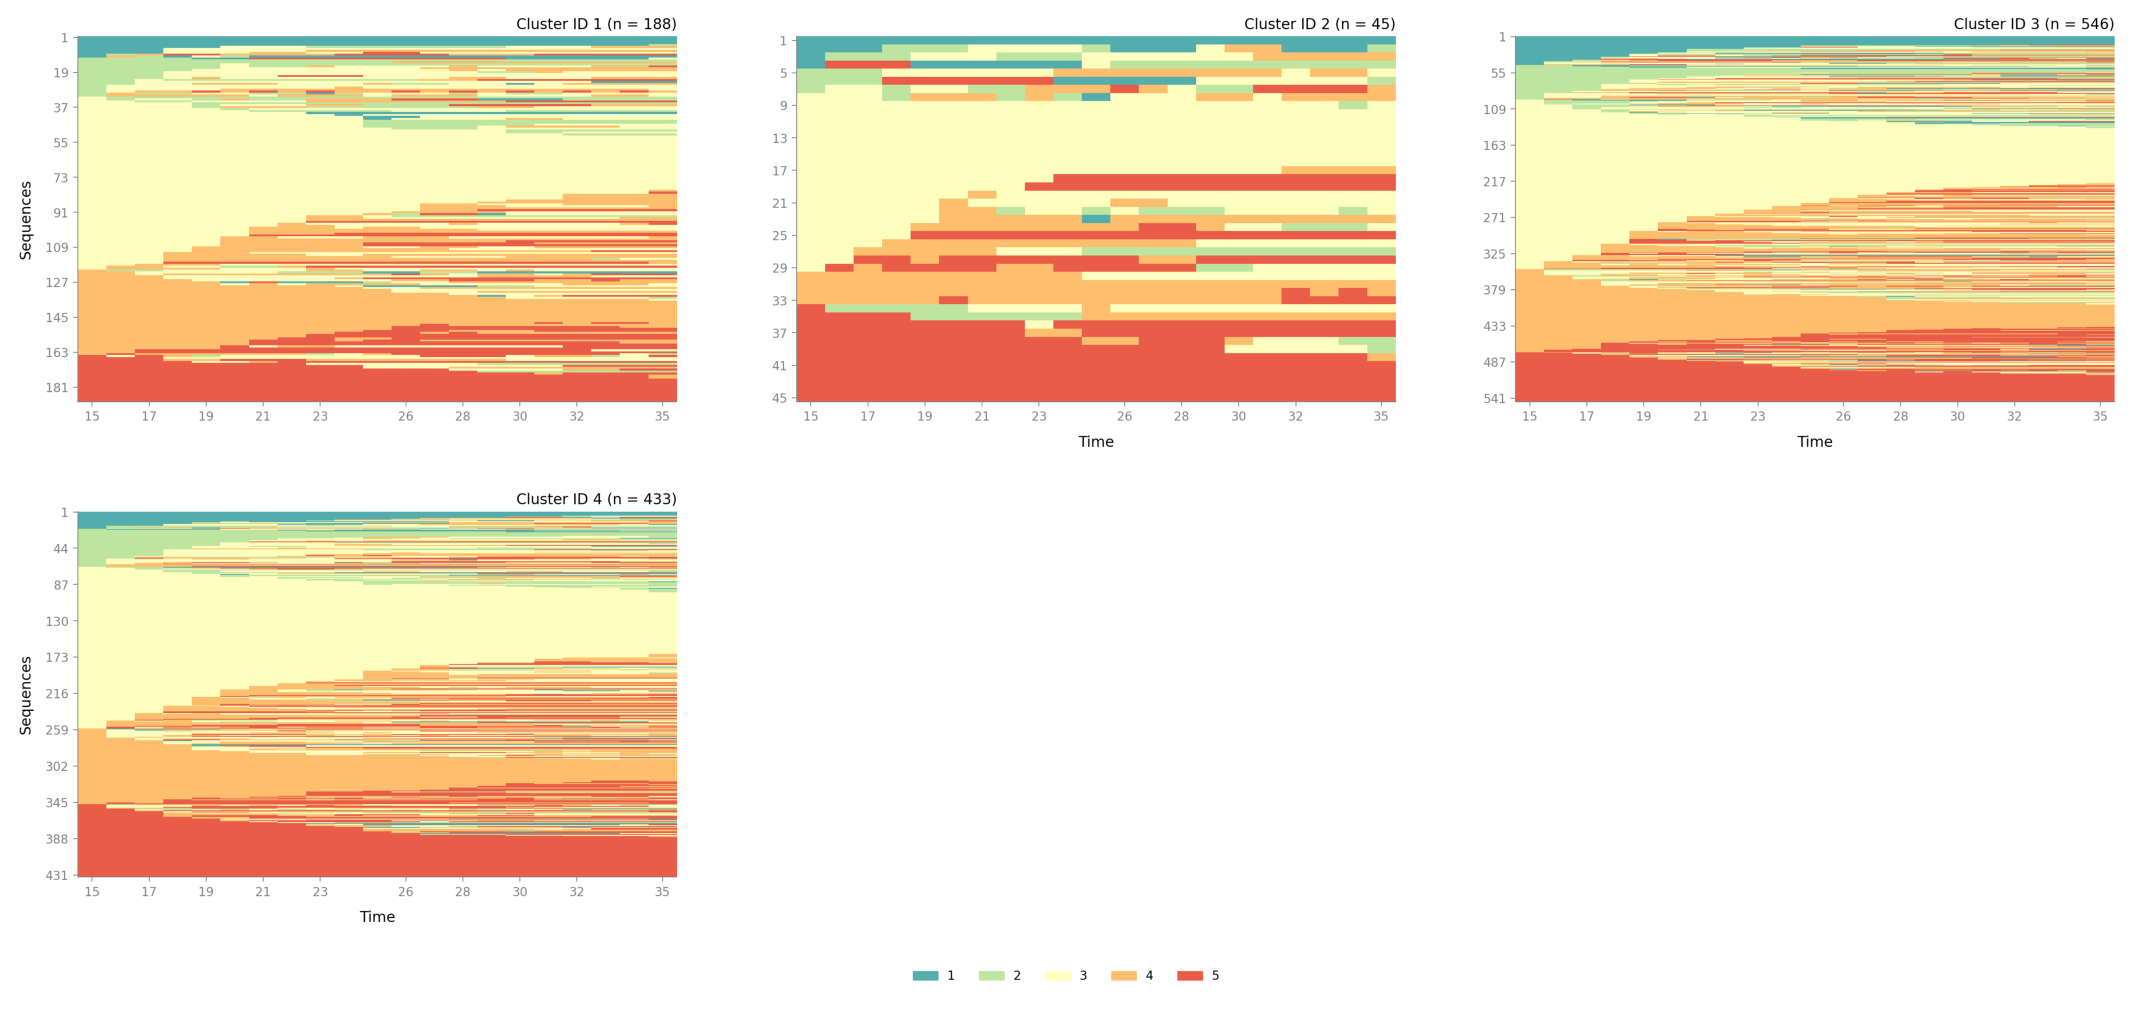

In [15]:
import pandas as pd

# 构建聚类标签 DataFrame
umap_cluster_df = pd.DataFrame({
    "ID": family_df["ID"],   # 对应每个人
    "Cluster ID": labels_final
})

# 可视化两个领域的轨迹（按聚类分类）
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=umap_cluster_df,
                    categories='Cluster ID',
                    save_as='umap_hdbscan_family_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=umap_cluster_df,
                    categories='Cluster ID',
                    save_as='umap_hdbscan_happiness_plot')
